In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

In [2]:
data = pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
data.index = data.iloc[:,0]
data.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [4]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [5]:
data = data.iloc[:,1:5]
data.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
data.index.name = 'Index' 
data.head()

,Murder,Assault,UrbanPop,Rape
Index,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [9]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
data.shape

(50, 4)

<Figure size 1080x720 with 0 Axes>

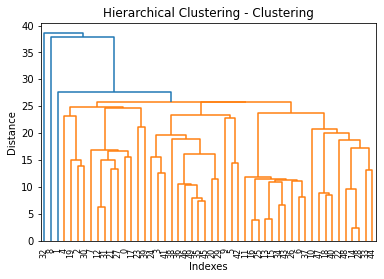

<Figure size 1080x720 with 0 Axes>

In [11]:
dendrogram = sch.dendrogram(sch.linkage(data, method='single'))
plt.xlabel('Indexes')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering - Clustering')
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

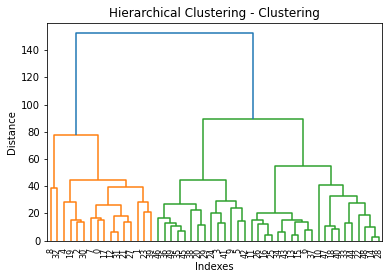

<Figure size 1080x720 with 0 Axes>

In [12]:
dendrogram = sch.dendrogram(sch.linkage(data, method='average'))
plt.xlabel('Indexes')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering - Clustering')
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

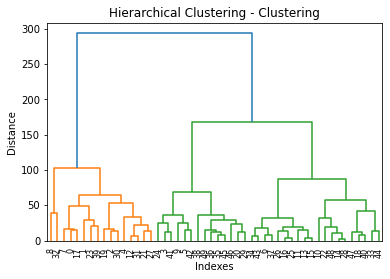

<Figure size 1080x720 with 0 Axes>

In [13]:
dendrogram = sch.dendrogram(sch.linkage(data, method='complete'))
plt.xlabel('Indexes')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering - Clustering')
plt.figure(figsize=(15,10))

In [14]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(data)
y_hc

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [15]:
pd.DataFrame({'index':data.index,'sets' : y_hc})[0:40]

,index,sets
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [16]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,2
4,0
5,2
6,3
7,0
8,0
9,2


In [17]:
data['cluster_new'] = hc.labels_
data

,Murder,Assault,UrbanPop,Rape,cluster_new
Index,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0


In [18]:
data.groupby('cluster_new').agg(['mean']).reset_index()

,cluster_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.812500,272.562500,68.312500,28.375000
1,1,2.950000,62.700000,53.900000,11.510000
2,2,8.214286,173.285714,70.642857,22.842857
3,3,5.590000,112.400000,65.600000,17.270000


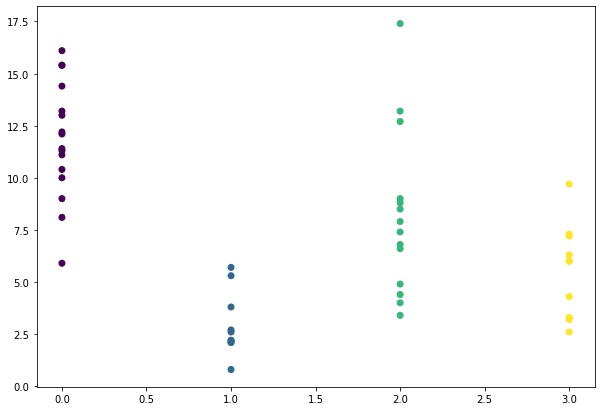

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(data['cluster_new'],data['Murder'],c= hc.labels_)

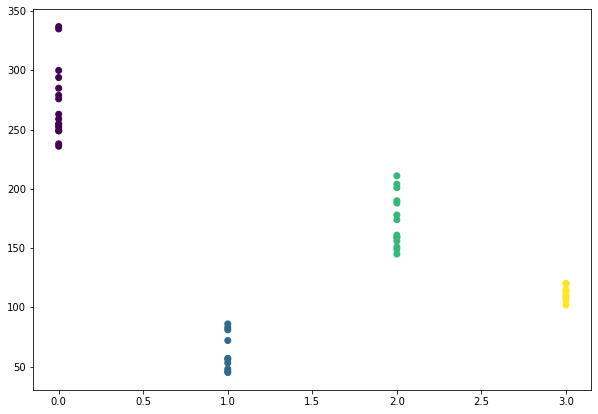

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(data['cluster_new'],data['Assault'],c= hc.labels_)

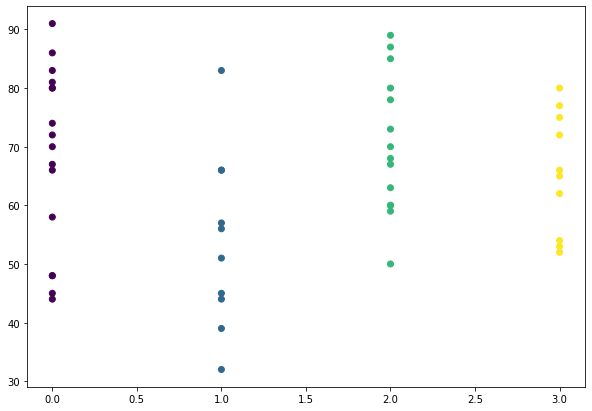

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(data['cluster_new'],data['UrbanPop'],c=hc.labels_)

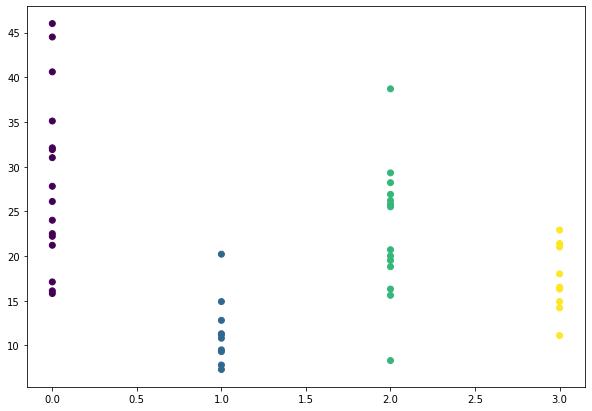

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(data['cluster_new'],data['Rape'],c= hc.labels_)

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
wcss = []
for i in range(1,15):
    kmeans = KMeans( n_clusters=i, random_state=13)
    kmeans.fit_predict(data)
    wcss.append(kmeans.inertia_)

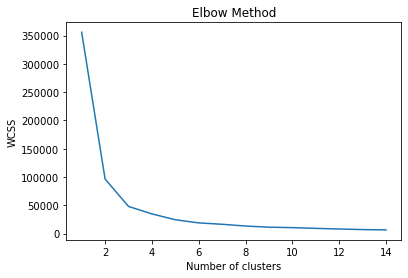

In [25]:
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(4, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=42)

In [27]:
data['kmeans_new'] = kmeans.labels_
data

,Murder,Assault,UrbanPop,Rape,cluster_new,kmeans_new
Index,,,,,,
Alabama,13.2,236,58,21.2,0,2
Alaska,10.0,263,48,44.5,0,2
Arizona,8.1,294,80,31.0,0,2
Arkansas,8.8,190,50,19.5,2,0
California,9.0,276,91,40.6,0,2
Colorado,7.9,204,78,38.7,2,0
Connecticut,3.3,110,77,11.1,3,1
Delaware,5.9,238,72,15.8,0,2
Florida,15.4,335,80,31.9,0,2


In [28]:
data.groupby('kmeans_new').agg(['mean']).reset_index()

,kmeans_new,Murder,Assault,UrbanPop,Rape,cluster_new
,,mean,mean,mean,mean,mean
0,0,8.214286,173.285714,70.642857,22.842857,2
1,1,5.590000,112.400000,65.600000,17.270000,3
2,2,11.812500,272.562500,68.312500,28.375000,0
3,3,2.950000,62.700000,53.900000,11.510000,1


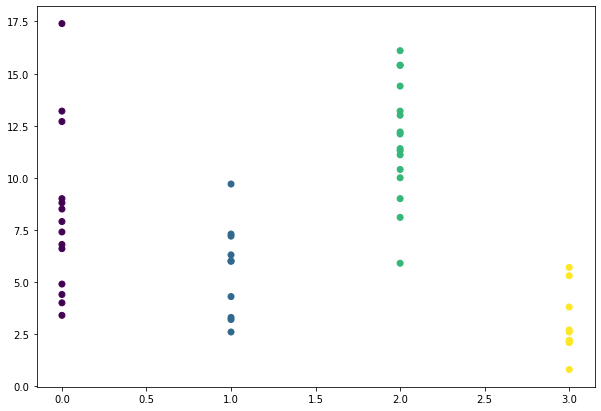

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(data['kmeans_new'],data['Murder'],c= kmeans.labels_)

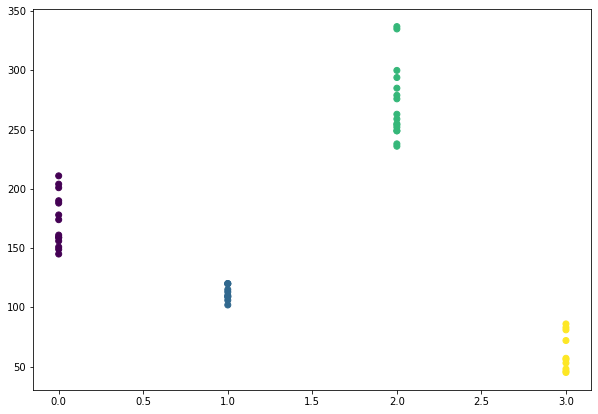

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(data['kmeans_new'],data['Assault'],c= kmeans.labels_)

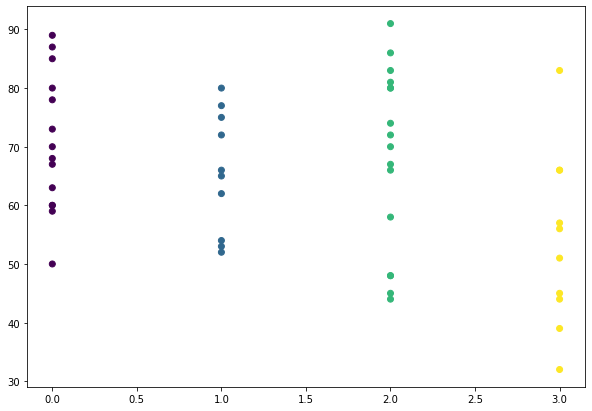

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(data['kmeans_new'],data['UrbanPop'],c= kmeans.labels_)

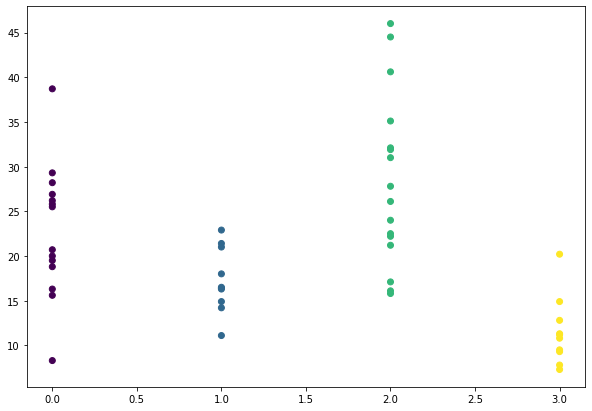

In [32]:
plt.figure(figsize=(10,7))
plt.scatter(data['kmeans_new'],data['Rape'],c= kmeans.labels_)

In [33]:
kmeans.cluster_centers_

array([[8.21428571e+00, 1.73285714e+02, 7.06428571e+01, 2.28428571e+01,
        2.00000000e+00],
       [5.59000000e+00, 1.12400000e+02, 6.56000000e+01, 1.72700000e+01,
        3.00000000e+00],
       [1.18125000e+01, 2.72562500e+02, 6.83125000e+01, 2.83750000e+01,
        4.44089210e-16],
       [2.95000000e+00, 6.27000000e+01, 5.39000000e+01, 1.15100000e+01,
        1.00000000e+00]])

In [34]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(data)

DBSCAN(eps=0.8, min_samples=6)

In [35]:
data['dbscan_new'] = dbscan.labels_

In [36]:
data

,Murder,Assault,UrbanPop,Rape,cluster_new,kmeans_new,dbscan_new
Index,,,,,,,
Alabama,13.2,236,58,21.2,0,2,-1
Alaska,10.0,263,48,44.5,0,2,-1
Arizona,8.1,294,80,31.0,0,2,-1
Arkansas,8.8,190,50,19.5,2,0,-1
California,9.0,276,91,40.6,0,2,-1
Colorado,7.9,204,78,38.7,2,0,-1
Connecticut,3.3,110,77,11.1,3,1,-1
Delaware,5.9,238,72,15.8,0,2,-1
Florida,15.4,335,80,31.9,0,2,-1


### Silhouette_score

In [37]:
from sklearn.metrics import silhouette_score as sil

In [38]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(data.iloc[:,0:4])
    iner.append(sil(data.iloc[:,0:4],y))

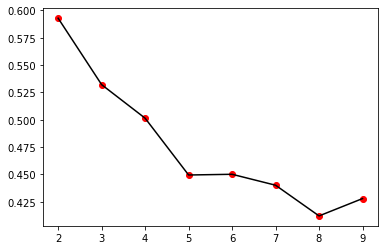

In [39]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

### Calinski_harabasz_score

In [41]:
from sklearn.metrics import calinski_harabasz_score as chs

In [43]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(data.iloc[:,:4])
    iner.append(chs(data.iloc[:,:4],y))

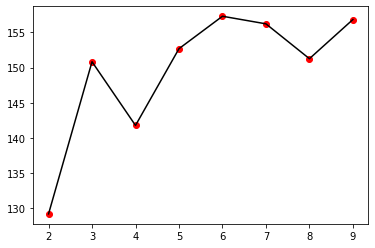

In [44]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()